In [4]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Check for missing/null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Density')

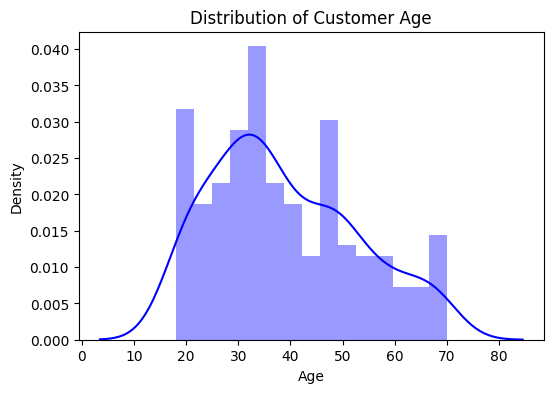

In [11]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Age'], bins=15, color='blue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Density')



Text(0, 0.5, 'Density')

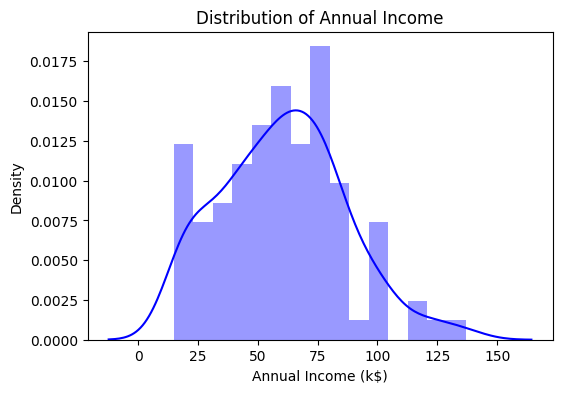

In [12]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Annual Income (k$)'], bins=15, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

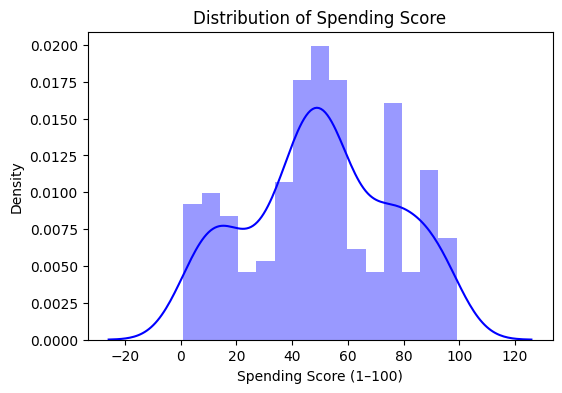

In [13]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Spending Score (1-100)'], bins=15, color='blue')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1–100)')
plt.ylabel('Density')


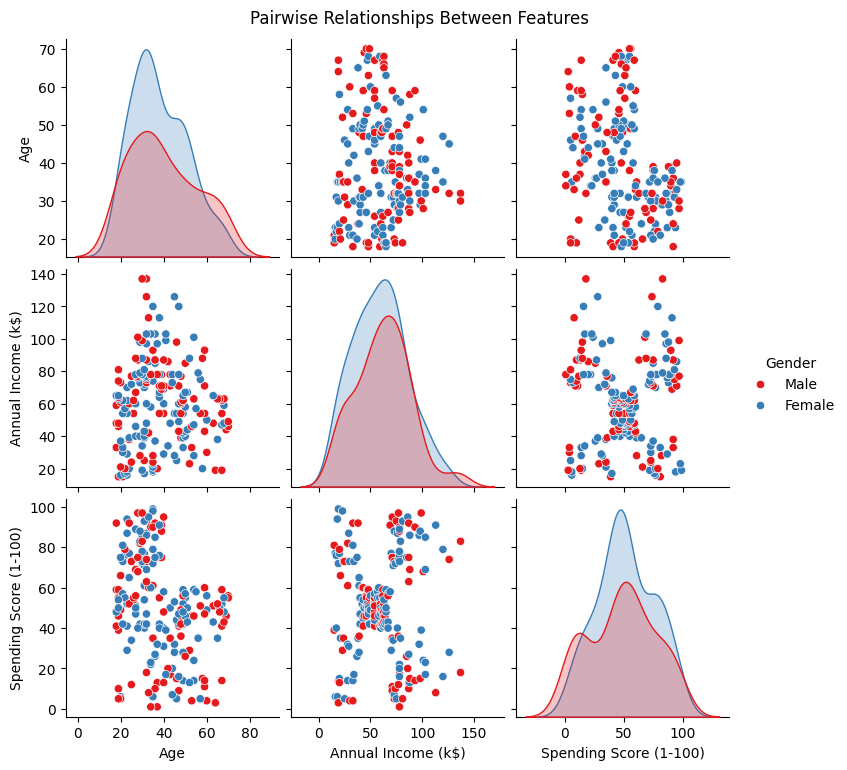

In [14]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette='Set1')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


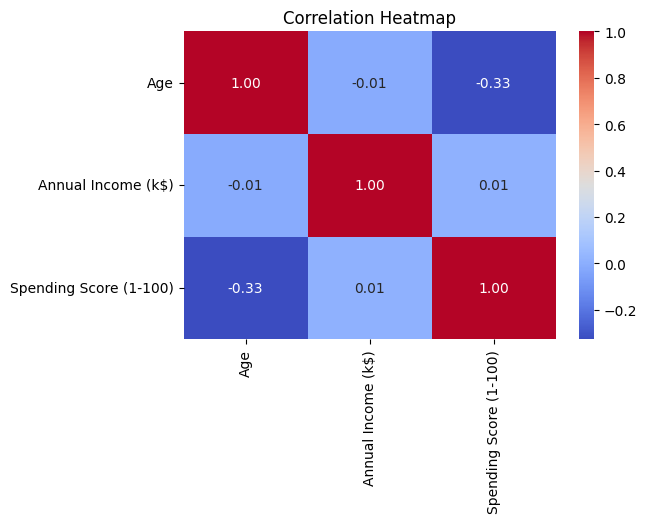

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [17]:
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [18]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [19]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)


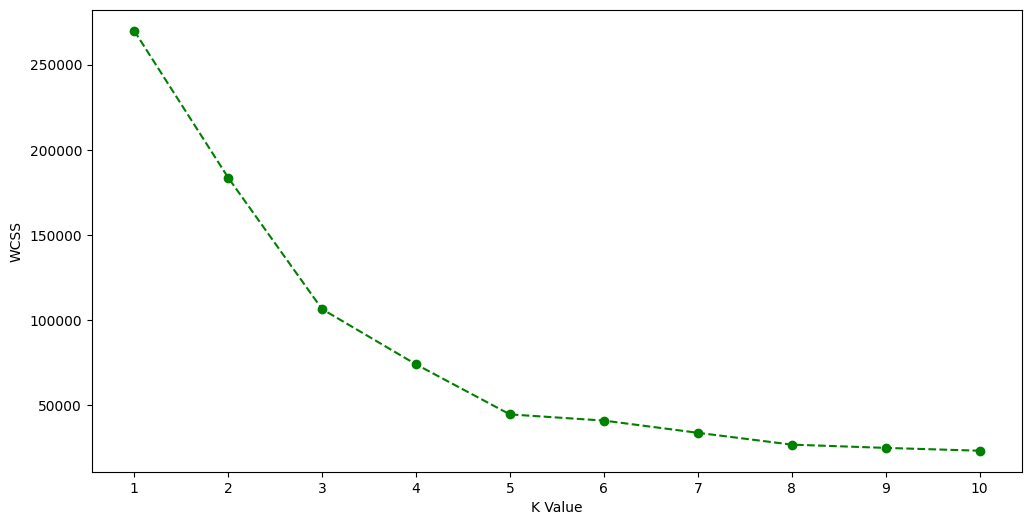

In [20]:
#plot The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='green')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [21]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


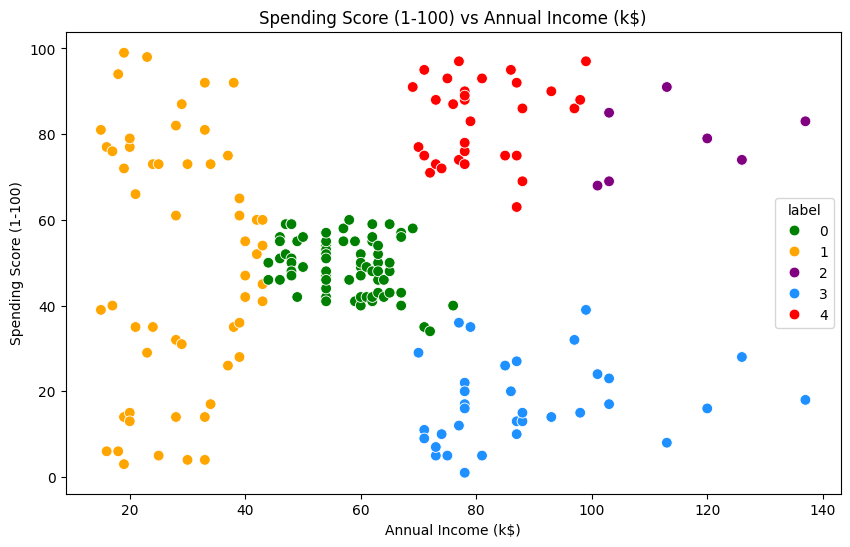

In [22]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','purple','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

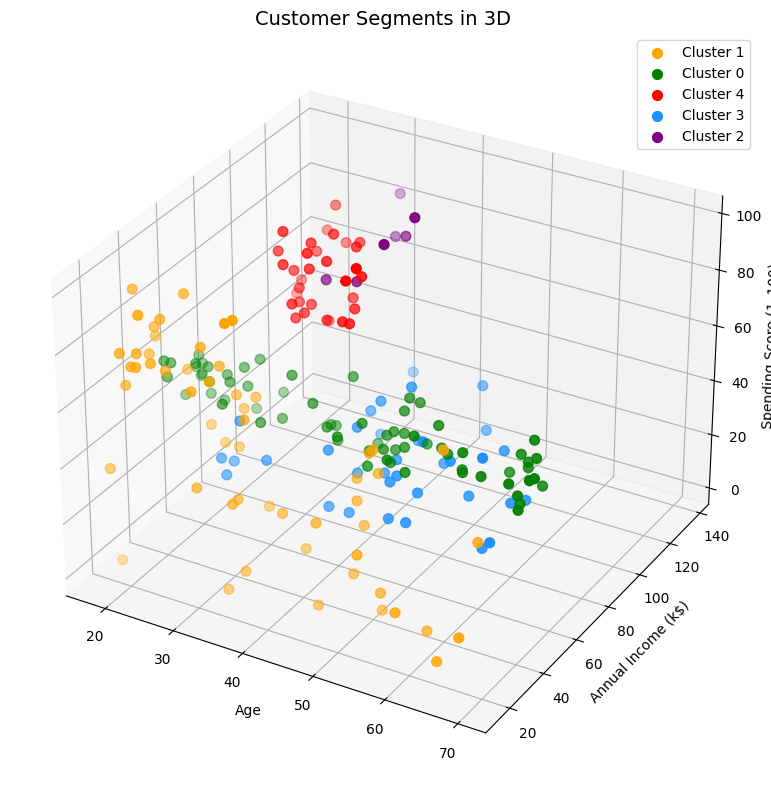

In [23]:
from mpl_toolkits.mplot3d import Axes3D
# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define custom colors for clusters
colors = ['green', 'orange', 'purple', 'dodgerblue', 'red']

# Plot each cluster
for label in df1['label'].unique():
    cluster_data = df1[df1['label'] == label]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        s=50,
        color=colors[label],
        label=f'Cluster {label}'
    )

# Label the axes
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1–100)')
ax.set_title('Customer Segments in 3D', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()


In [24]:
# Group by cluster label and calculate means
summary = df1.groupby('label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
summary.index.name = 'Cluster'
summary.reset_index(inplace=True)

# Display the summary
print(summary)


   Cluster   Age  Annual Income (k$)  Spending Score (1-100)
0        0  43.2                57.5                    49.3
1        1  36.3                29.0                    49.8
2        2  33.0               114.7                    78.4
3        3  41.1                88.2                    17.1
4        4  32.6                80.4                    82.9


In [25]:
# Loop through all clusters and print as requested
for label in sorted(df1['label'].unique()):
    ids = df1[df1['label'] == label]["CustomerID"].values
    print(f"Number of customers in group {label + 1}: {len(ids)}")
    print("They are -", ids.tolist())
    print("-" * 60)


Number of customers in group 1: 70
They are - [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 127, 133, 143]
------------------------------------------------------------
Number of customers in group 2: 56
They are - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
------------------------------------------------------------
Number of customers in group 3: 7
They are - [188, 190, 192, 194, 196, 198, 200]
------------------------------------------------------------
Number of customers in group 4: 35
They are - [125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155, 157, 159